In [11]:
import keras
import pandas as pd
import numpy as np
from keras.layers import *
from keras.activations import *
from keras.callbacks import *
from keras.models import *

In [12]:
data = pd.read_csv('../data/files/multiple_concatenated_tickers.csv')
data.head()

,Index,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,TSLA.Open,TSLA.High,TSLA.Low,...,AMZN.Low,AMZN.Close,AMZN.Volume,AMZN.Adjusted,NFLX.Open,NFLX.High,NFLX.Low,NFLX.Close,NFLX.Volume,NFLX.Adjusted
0,2007-01-03,12.327143,12.368571,11.700000,11.971429,309579900.0,7.982585,0.0,0.0,0.0,...,38.049999,38.700001,12405100,38.700001,3.714286,3.824286,3.677143,3.801429,16440900.0,3.801429
1,2007-01-04,12.007143,12.278571,11.974286,12.237143,211815100.0,8.159763,0.0,0.0,0.0,...,38.259998,38.900002,6318400,38.900002,3.772857,3.828571,3.585714,3.621428,15959300.0,3.621428
2,2007-01-05,12.252857,12.314285,12.057143,12.150000,208685400.0,8.101658,0.0,0.0,0.0,...,37.599998,38.369999,6619700,38.369999,3.620000,3.620000,3.492857,3.544286,15190700.0,3.544286
3,2007-01-08,12.280000,12.361428,12.182858,12.210000,199276700.0,8.141665,0.0,0.0,0.0,...,37.169998,37.500000,6783000,37.500000,3.545714,3.555714,3.367143,3.404286,18344900.0,3.404286
4,2007-01-09,12.350000,13.282857,12.164286,13.224286,837324600.0,8.817995,0.0,0.0,0.0,...,37.340000,37.779999,5703000,37.779999,3.427143,3.440000,3.360000,3.427143,10611300.0,3.427143


In [13]:
data_mat = data.iloc[:,1:].as_matrix()

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [14]:
def normalise_windows(window_data):
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

In [15]:
seq_len = 5
data = np.array(normalise_windows(data_mat))

In [16]:
sequence_length = seq_len + 1
result = []
for index in range(len(data) - sequence_length):
    result.append(data[index: index + sequence_length])

# if normalise_window:
#     result = normalise_windows(result)

result = np.array(result)

row = round(0.9 * result.shape[0])
train = result[:int(row), :]
np.random.shuffle(train)
x_train = train[:, :-1]
y_train = train[:, -1]
y_train = y_train[:,1] # Extract AAPL Only
x_test = result[int(row):, :-1]
y_test = result[int(row):, -1]
y_test = y_test[:,1] # Extract AAPL Only

# x_train = np.reshape(x_train, (1, x_train.shape[0], x_train.shape[1]))
# x_test = np.reshape(x_test, (1, x_test.shape[0], x_test.shape[1]))  

[x_train, y_train, x_test, y_test]

[array([[[ 0.00000000e+00,  4.37972448e-03, -3.28488643e-03, ...,
          -3.91115328e-01,  1.04045757e+06, -3.91115328e-01],
         [ 0.00000000e+00,  2.12719124e-03, -1.03893366e-02, ...,
          -4.33363114e-01,  1.08003233e+06, -4.33363114e-01],
         [ 0.00000000e+00,  2.51765448e-03, -8.48537567e-03, ...,
          -4.45342388e-01,  1.38224276e+06, -4.45342388e-01],
         [ 0.00000000e+00,  9.37496849e-03, -2.53126555e-03, ...,
          -4.42187516e-01,  9.73690223e+05, -4.42187516e-01],
         [ 0.00000000e+00,  4.73390026e-03, -3.08319170e-03, ...,
          -4.34270731e-01,  7.42987898e+05, -4.34270731e-01]],
 
        [[ 0.00000000e+00,  1.66861134e-01, -8.16794642e-03, ...,
          -7.16569425e-01,  7.81311728e+05, -7.16569425e-01],
         [ 0.00000000e+00,  5.71974626e-02, -3.37637669e-02, ...,
          -7.57054014e-01,  5.58519298e+05, -7.57054014e-01],
         [ 0.00000000e+00,  1.20413724e-03, -1.12850581e-01, ...,
          -7.93222078e-01,  5.79898

In [22]:
LAYERS = 250
model = Sequential()

model.add(LSTM(
    input_dim=36,
    output_dim=LAYERS,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    LAYERS,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mae', optimizer='adam')
print('compilation time : ', time.time() - start)

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  import sys
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 36), units=250)`
  import sys


compilation time :  0.022923946380615234


/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  app.launch_new_instance()


In [23]:
MODELNAME = 'multiplemodeltest'
earlyStopping = EarlyStopping(monitor='val_loss', patience=100, verbose=0, mode='min')
mcp_save = ModelCheckpoint('./forecast/models/'+MODELNAME+'_best.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, verbose=1, epsilon=1e-4, mode='min')

/usr/local/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [24]:
VALIDATIONSIZE = 0.3
EPOCHS = 10
history = model.fit(
    x_train,
    y_train,
    batch_size=512,
    nb_epoch=EPOCHS,
    validation_split=VALIDATIONSIZE,
    callbacks = [reduce_lr_loss, earlyStopping])

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 1946 samples, validate on 835 samples
Epoch 1/10
1946/1946 [==============================] - 3s 2ms/step - loss: 0.2697 - val_loss: 0.1444
Epoch 2/10
1946/1946 [==============================] - 1s 530us/step - loss: 0.1976 - val_loss: 0.0774
Epoch 3/10
1946/1946 [==============================] - 1s 535us/step - loss: 0.1233 - val_loss: 0.0956
Epoch 4/10
1946/1946 [==============================] - 1s 564us/step - loss: 0.1103 - val_loss: 0.0730
Epoch 5/10
1946/1946 [==============================] - 1s 534us/step - loss: 0.1029 - val_loss: 0.0289
Epoch 6/10
1946/1946 [==============================] - 1s 526us/step - loss: 0.0860 - val_loss: 0.0432
Epoch 7/10
1946/1946 [==============================] - 1s 524us/step - loss: 0.0773 - val_loss: 0.0342
Epoch 8/10
1946/1946 [==============================] - 1s 557us/step - loss: 0.0709 - val_loss: 0.0200
Epoch 9/10
1946/1946 [==============================] - 1s 539us/step - loss: 0.0629 - val_loss: 0.0195
Epoch 10/10
1946/19

In [26]:
# 5 refers to days of data. 5 days worth. each 1 row has 36 features
model.predict(np.reshape(data[-5:], (5, 1, 36)))

array([[-0.00457038],
       [-0.00482715],
       [-0.00380713],
       [-0.02460941],
       [ 0.03127313]], dtype=float32)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


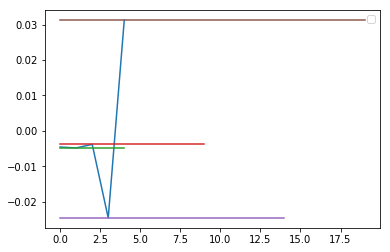

In [43]:
import matplotlib.pyplot as plt
def plot_results_multiple(predicted_data, true_data, prediction_len, suffix):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data)
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [0 for p in range(i * prediction_len)]
        plt.plot(padding + data)
        plt.legend()
    plt.show()

plot_results_multiple(model.predict(np.reshape(data[-5:], (5, 1, 36))),
                      model.predict(np.reshape(data[-5:], (5, 1, 36))),
                      5, 'k')

(2781, 6, 36)

In [ ]:
list(model.predict(np.reshape(ndata[-5:], (5, 1, 36))).reshape(1,-1)[0])